Importing the important libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\2216027\\kaggle2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\2216027\kaggle2\data\sample_submission.csv
C:\Users\2216027\kaggle2\data\test.csv
C:\Users\2216027\kaggle2\data\train.csv
C:\Users\2216027\kaggle2\data\train_labels.csv


Loading and preparing the dataset

In [13]:
train_df = pd.read_csv('C:\\Users\\2216027\\kaggle2\\data\\train.csv')
train_df.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359


In [15]:
train_labels_df = pd.read_csv('C:\\Users\\2216027\\kaggle2\\data\\train_labels.csv')
train_labels_df.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [16]:
train_df=pd.merge(train_df,train_labels_df,on='sequence',how='left')
train_df.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0


In [17]:
state = train_df['state']
train_df.drop(['sequence','step','subject', 'state'],axis=1,inplace=True)
X_train = train_df
X_train.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359


Normalizing the Dataset

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
scaled_data=scaler.transform(X_train)

#Reducing the number of samples to 0.05% of original size
samples = int(1558080 * 0.0005)
scaled_data = scaled_data[:samples, :]
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.073994,0.025755,0.529941,0.084226,-0.595617,-0.081710,-0.037993,0.113685,-0.022186,-0.372260,-0.513943,0.118173,0.121766
1,-0.168462,0.030764,0.529941,-0.166807,0.097598,0.214962,-0.062496,-0.267356,0.044458,-0.116728,0.042977,-0.050247,0.011916
2,0.122789,-0.157416,0.529941,0.084451,0.282421,0.805957,-0.028192,0.165228,0.311034,0.385976,0.234122,-0.128556,-0.120775
3,0.196619,0.170766,0.529941,0.248882,-0.333470,-0.451728,0.237261,0.293261,-0.066615,-0.384521,-0.226680,0.297488,0.011273
4,0.102151,0.244225,0.529941,-0.034093,0.237816,0.029248,0.167563,-0.167094,-0.199903,0.406597,0.423661,0.028061,-0.005410


In [19]:
state = np.array(state)
state = state[:samples]
state.shape

(779,)

PCA(Principal Component Analysis)

In [20]:
from sklearn.decomposition import PCA
pca_full = PCA(n_components=13)
pca_full.fit(scaled_data)

PCA(n_components=13)

In [21]:
X_pca_full = pca_full.transform(scaled_data)

In [22]:
X_pca_full = pd.DataFrame(data=X_pca_full)
X_pca_full.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.775276,0.127477,-0.075191,-0.191571,-0.301513,-0.092867,-0.468246,0.178001,-0.015065,-0.147504,0.038339,0.060153,-0.033804
1,0.088644,-0.212114,-0.014546,-0.298715,0.250172,-0.116117,-0.466029,0.069801,-0.055533,-0.049101,0.024767,0.024866,-0.012479
2,0.355011,-0.804497,-0.034466,0.314846,0.037032,-0.070433,-0.497210,-0.167560,-0.230405,0.368416,-0.079369,-0.097133,0.058090
3,-0.357416,0.462603,0.047207,0.171992,-0.489148,-0.026987,-0.442252,0.431560,-0.010971,-0.289453,0.021027,0.119350,-0.072052
4,0.465691,-0.039402,-0.028910,0.273764,0.386460,0.084681,-0.430922,0.305641,0.229437,0.091723,-0.027379,-0.081633,0.075245


SCREE PLOT : explains the %-of-variance each feature brings out. Number of features can be selected based on the top features causing 80%-90% variance in the dataset.

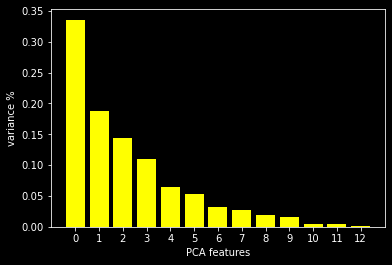

<Figure size 1440x1080 with 0 Axes>

In [24]:
features = range(pca_full.n_components_)
plt.bar(features, pca_full.explained_variance_ratio_, color="yellow")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.figure(figsize=(20, 15))
plt.show()

In [25]:
var_ratio = pca_full.explained_variance_ratio_
var_ratio = (i*100 for i in var_ratio)
list(var_ratio)

[33.56352005374415,
 18.753884046536047,
 14.451058451841536,
 10.950802918508245,
 6.519325056102164,
 5.249358070977499,
 3.1859841141108376,
 2.7638183642405107,
 1.9637961599425848,
 1.573383906929805,
 0.5030636805954048,
 0.4084099541943862,
 0.11359522227680345]

Selecting top-5 features explains approximately 84% of the total variance.

For visualization purposes, selecting only 2 of the best features. Together they explain roughly 52% of the variance.

In [26]:
pca_2 = PCA(n_components = 2)
pca_2.fit(scaled_data)

PCA(n_components=2)

In [27]:
X_pca2 = pca_2.transform(scaled_data)

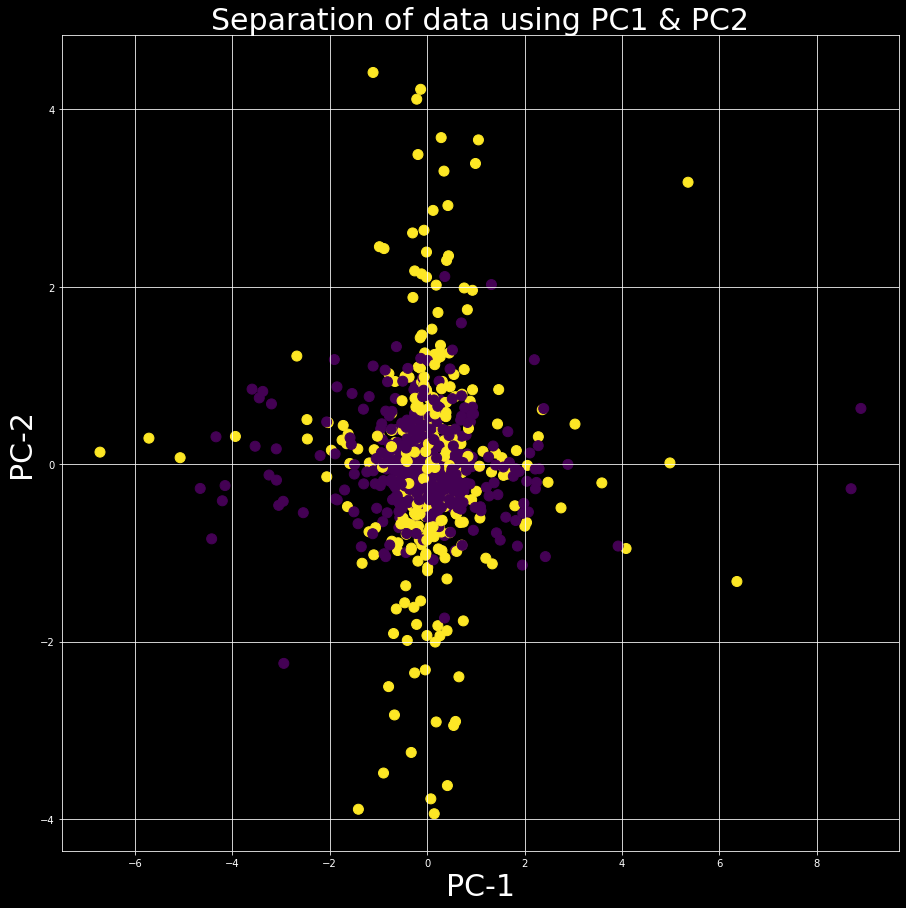

In [28]:
plt.figure(figsize=(15, 15))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=state, s=100)
plt.grid(True)
plt.xlabel("PC-1", fontsize=30)
plt.ylabel("PC-2", fontsize=30)
plt.title("Separation of data using PC1 & PC2", fontsize=30)
plt.show()

Gaussian Mixture Models (GMM)

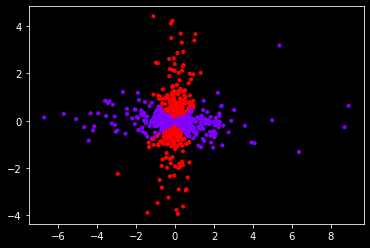

In [29]:
from sklearn.mixture import GaussianMixture
gmm2 = GaussianMixture(n_components=2, covariance_type="full").fit(X_pca2)
labels2 = gmm2.predict(X_pca2)
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels2, s=10, cmap='rainbow')

Comparing other "covariance_type"



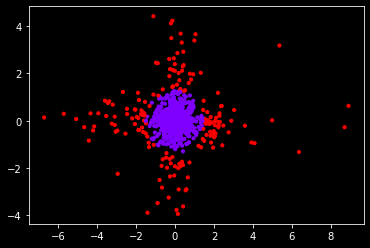

In [30]:
gmm3 = GaussianMixture(n_components=2, covariance_type="diag").fit(X_pca2)
labels3 = gmm3.predict(X_pca2)
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels3, s=10, cmap='rainbow')

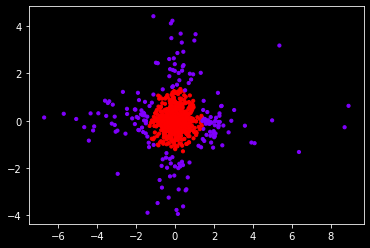

In [31]:
gmm4 = GaussianMixture(n_components=2, covariance_type="spherical").fit(X_pca2)
labels4 = gmm4.predict(X_pca2)
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels4, s=10, cmap='rainbow')

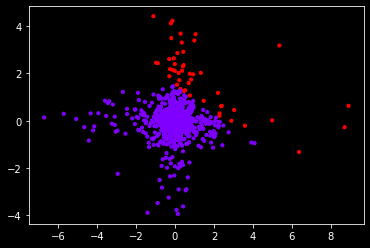

In [32]:
gmm5 = GaussianMixture(n_components=2, covariance_type="tied").fit(X_pca2)
label5 = gmm5.predict(X_pca2)
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=label5, s=10, cmap='rainbow')